In [1]:
%load_ext autoreload
%autoreload 2

In [42]:
import numpy as np
from collections import defaultdict
from random import random
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import sys
sys.path.append('../')

from Agents import QAgent, SightedQAgent
from Environments import BraessParadoxEnv
from visualization_tools import *

In [3]:
def run_experiment(config, verbose=True):
    
    n_agents = config['n_agents']
    social_welfare_type = config['social_welfare_type']
    n_episodes = config['n_episodes']
    agent_params = config['agent_params']
    agent_type = config['agent_type']
    
    env = BraessParadoxEnv(n_agents=n_agents, social_welfare_type=social_welfare_type)
    
    agents = [eval(agent_type)(**agent_params, id_agent=i) for i in tqdm(range(n_agents))]

    # Intialization
    
    scores = defaultdict(list)
    win_pct_list = []
    cooperations = []
    qvalues = []
    actions_list = []

    for i_episode in tqdm(range(n_episodes)):


        actions_episode = []
        done = False
        state = env.reset()
        scores_episode = defaultdict(int)

        while not done:

            actions = [agents[i].choose_action(state) for i in range(n_agents)]
            new_state, rewards, done, info = env.step(actions)

            for id_agent in range(n_agents):
                agents[id_agent].learn(state, actions[id_agent], rewards[id_agent], new_state)
                scores_episode[id_agent] += rewards[id_agent]

            state = new_state
            actions_episode.append(actions)

        actions_list.append(actions_episode)

        qvalues.append(agents[0].Q)

        for id_agent in range(n_agents):
            scores[id_agent].append(scores_episode[id_agent])

        if verbose and i_episode % 100 == 0:

            mean_scores = [np.mean(scores[i][-100:]) for i in range(n_agents)]

            print('episode ', i_episode, 
                  '\n Mean Reward Agent 1 %.2f' % mean_scores[0],
                  '\n epsilon %.2f \n' % agents[0].epsilon,
                 '-'*100)
    
    report = {'scores': scores,
             'actions_list': actions_list,
             'qvalues': qvalues}
    return report

## SightedQAgent

In [49]:
experiment_config = {
    'n_episodes': 1000,
    'n_agents': 400,
    'social_welfare_type': 'utilitiarian',
    'agent_type': 'SightedQAgent',
    'agent_params': {
        'lr': 0.005, 
        'gamma': 0.95, 
        'eps_start': 1.0, 
        'eps_end': 0.001,
        'eps_dec': 0.995,
        'n_agents': 40
        }
   }

report = run_experiment(experiment_config)

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

episode  0 
 Mean Reward Agent 1 -302.45 
 epsilon 0.99 
 ----------------------------------------------------------------------------------------------------
episode  100 
 Mean Reward Agent 1 -316.36 
 epsilon 0.36 
 ----------------------------------------------------------------------------------------------------
episode  200 
 Mean Reward Agent 1 -339.69 
 epsilon 0.13 
 ----------------------------------------------------------------------------------------------------
episode  300 
 Mean Reward Agent 1 -383.19 
 epsilon 0.05 
 ----------------------------------------------------------------------------------------------------
episode  400 
 Mean Reward Agent 1 -390.70 
 epsilon 0.02 
 ----------------------------------------------------------------------------------------------------
episode  500 
 Mean Reward Agent 1 -386.44 
 epsilon 0.01 
 ----------------------------------------------------------------------------------------------------
episode  600 
 Mean Reward Agent 1 -

In [50]:
scores = report['scores']
actions_list = report['actions_list']

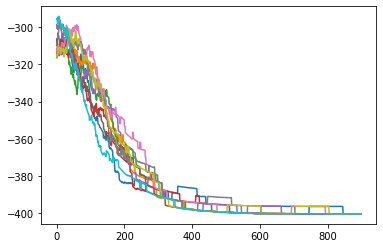

In [51]:
plot_scores(scores)

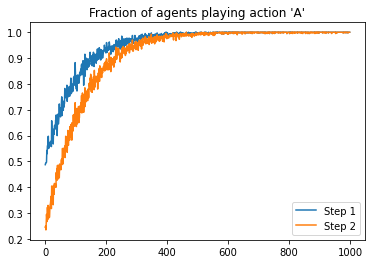

In [52]:
plot_actions(actions_list)

## QAgent

In [53]:
experiment_config = {
    'n_episodes': 1000,
    'n_agents': 400,
    'social_welfare_type': 'utilitiarian',
    'agent_type': 'QAgent',
    'agent_params': {
        'lr': 0.005, 
        'gamma': 0.95, 
        'eps_start': 1.0, 
        'eps_end': 0.001,
        'eps_dec': 0.995
        }
   }

report = run_experiment(experiment_config)

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

episode  0 
 Mean Reward Agent 1 -307.45 
 epsilon 0.99 
 ----------------------------------------------------------------------------------------------------
episode  100 
 Mean Reward Agent 1 -457.05 
 epsilon 0.36 
 ----------------------------------------------------------------------------------------------------
episode  200 
 Mean Reward Agent 1 -622.93 
 epsilon 0.13 
 ----------------------------------------------------------------------------------------------------
episode  300 
 Mean Reward Agent 1 -747.42 
 epsilon 0.05 
 ----------------------------------------------------------------------------------------------------
episode  400 
 Mean Reward Agent 1 -780.55 
 epsilon 0.02 
 ----------------------------------------------------------------------------------------------------
episode  500 
 Mean Reward Agent 1 -795.90 
 epsilon 0.01 
 ----------------------------------------------------------------------------------------------------
episode  600 
 Mean Reward Agent 1 -

In [54]:
scores = report['scores']
actions_list = report['actions_list']

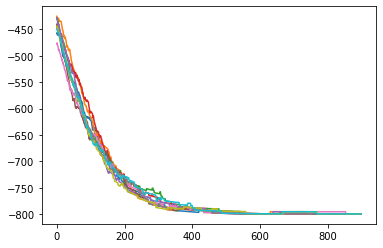

In [55]:
plot_scores(scores)

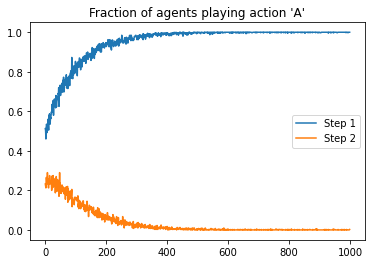

In [56]:
plot_actions(actions_list)